<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. Raw hight resolution images uses series network layers
2.** Convolution layer(relu) + Poolying layer + Fully connected neural n/w**
3. Activation function - Relu : -ve values become zero and +ve values remain same  
4. Convolution layer depicts bright pixes as +1 and dark pixels as -1.
5. Convolution layer gives out various feature maps by applying varous kernals 9x9 or 16x16 and then applies activation Relu function.
6. Pooling uses pooling operations like sum or average or max - avoids overfitting.
7. Max pooling uses 2x2 and picks only brightest pixels from image which scales down it.

8. Output of pooling layer is almost similar but a shrinked version of it.

9. Model = conv1 + pool1 + conv2 + pool2 + FC(fully connected) + FC2 + softmax (output)

10.  http://scs.ryerson.ca


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


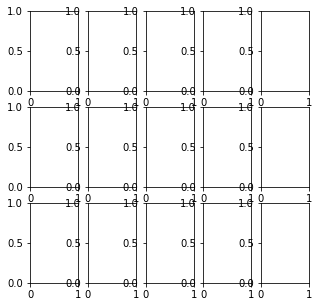

In [29]:
number_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=3, ncols=cols, figsize=(5,5))

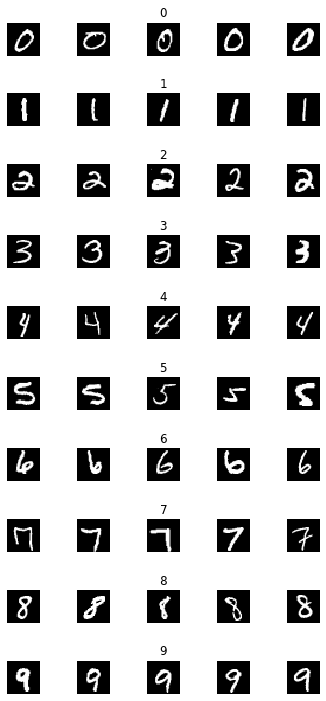

In [30]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
             axs[j][i].set_title(str(j))
             number_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

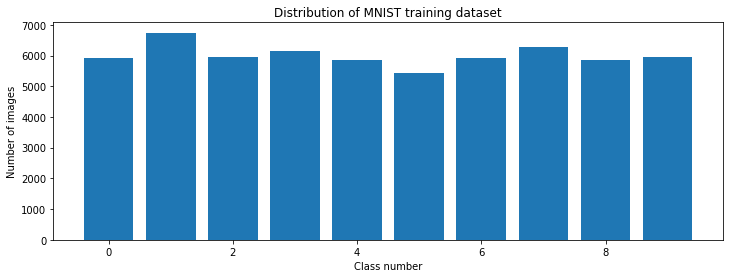

In [31]:
print(number_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), number_of_samples)
plt.title("Distribution of MNIST training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

Added a depth of 1


In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

1.   Using : LENet Model - 1998 recognizes hand written letters in cheque book
2.   Other models we have are AlexNet, zfNet, GoogleNet


In [0]:
# Define leNet model
def leNet_model():
    model = Sequential()
    #  = 30 feature maps - 24x24 = (24*30*bias) = 780
    # Strides=1 - how may pixes to move
    # Padding="same/" - How much outer pixel to add as padding to retain outer features. 
    model.add(Conv2D(30, (5,5), input_shape=(28, 28, 1), activation='relu', strides=1, padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2))) #Shrinks from 24x24x30 to 12x12x30

    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) #Shrinks from 24x24x30 to 12x12x30

    model.add(Flatten())

    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [36]:
model = leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               270500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [37]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.2171 - acc: 0.9299 - val_loss: 0.0567 - val_acc: 0.9837
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0504 - acc: 0.9842 - val_loss: 0.0404 - val_acc: 0.9875
Epoch 3/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0342 - acc: 0.9891 - val_loss: 0.0401 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0408 - val_acc: 0.9880
Epoch 5/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0505 - val_acc: 0.9855
Epoch 6/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0185 - acc: 0.9942 - val_loss: 0.0439 - val_acc: 0.9898
Epoch 7/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0203 - acc: 0.9930 - val_loss: 0.0388 - val_acc:

Text(0.5, 1.0, 'loss')

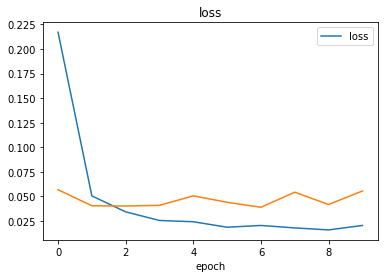

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

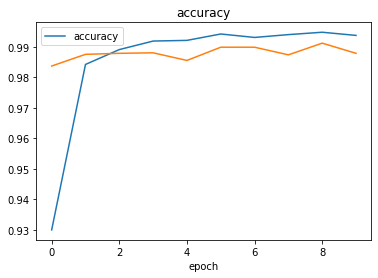

In [39]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

In [40]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score : ', score[0])
print('Test accuracy : ', score[1])

<class 'list'>
Test score :  0.052705183503888337
Test accuracy :  0.9867


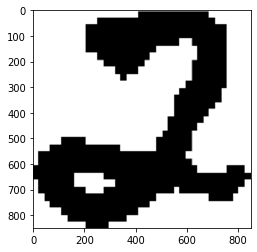

In [57]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

(850, 850, 4)
(28, 28, 4)


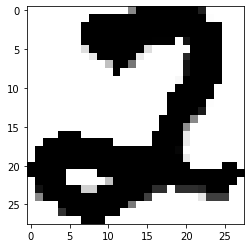

In [51]:
import cv2

img_array = np.asarray(img)
print(img_array.shape)
resized = cv2.resize(img_array, (28, 28))
print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))

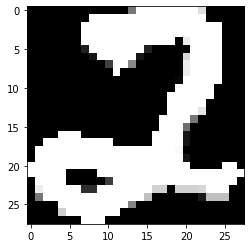

In [52]:
inverted_gray_scale = cv2.bitwise_not(gray_scale)
plt.imshow(inverted_gray_scale, cmap=plt.get_cmap("gray"))

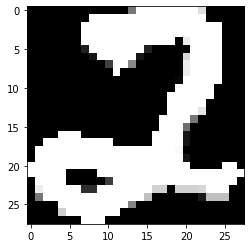

In [53]:
inverted_gray_scale = cv2.bitwise_not(gray_scale)
plt.imshow(inverted_gray_scale, cmap=plt.get_cmap("gray"))

In [0]:
inverted_gray_scale = inverted_gray_scale/255
inverted_gray_scale = inverted_gray_scale.reshape(1, 28, 28, 1)

In [55]:
prediction = model.predict_classes(inverted_gray_scale)
print("Predicted digit: ", str(prediction))

Predicted digit:  [2]
